In [1]:
import pandas as pd
import numpy as np
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

plt.style.use('ggplot')
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  #解决seaborn中文字体显示问题
plt.rc('figure', figsize=(10, 10))  #把plt默认的图片size调大一点
plt.rcParams["figure.dpi"] =mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline

In [2]:
#conn = MongoClient(host='127.0.0.1', port=27017)  # 实例化MongoClient
#db = conn.get_database('Laborday')  

#col = db.get_collection('ticket') # 连接到集合ticket
#mon_data = col.find()  # 查询这个集合下的所有记录

In [3]:
data = pd.read_csv(r'C:\Users\dell\Desktop\data.csv')

In [4]:
data.sample(5)

,_id,city,fields.cityName,fields.comment,fields.discountPrice,fields.distance,fields.features,fields.featuresNew,fields.fromName,fields.h5_url,...,fields.sold365,fields.soldRecent,fields.soldRecentNum,fields.subTitle,fields.tagList,fields.title,fields.titleTagInfos,fields.type,src,trip_main_busness_type
27223,5cc71a7364eeab7d62a586eb,宜昌,NaN,4.0,154.0,NaN,"[{'key': None, 'text': '最早可定明日票', 'color': Non...","[{'key': None, 'text': '最早可定明日票', 'color': Non...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售40笔,月售36笔,36,NaN,[],宜昌三峡人家大门票+景区摆渡船票 电子票 未用可退,[],NaN,mix,vocation
22470,5cc71a1c64eeab7d62a5745a,烟台,NaN,0.0,39.0,NaN,"[{'key': None, 'text': '出票后立即可用', 'color': Non...","[{'key': None, 'text': '出票后立即可用', 'color': Non...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售9笔,NaN,0,NaN,[],山东蓬莱旅游唐皇山谷国宾酒庄门票成人电子票景区售票处换票入园,[],NaN,mix,vocation
42380,5cc71b6064eeab7d62a5c220,南充,NaN,0.0,100.0,NaN,"[{'key': None, 'text': '14:00前可订今日票', 'color':...","[{'key': None, 'text': '14:00前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,NaN,NaN,0,NaN,[],阆中古城票含张飞庙贡院中天楼文庙川北道署/3天有效/凭身份证入,[],NaN,mix,vocation
7749,5cc7194264eeab7d62a53ad9,苏州,NaN,2.0,49.5,NaN,"[{'key': None, 'text': '15:40前可订今日票', 'color':...","[{'key': None, 'text': '15:40前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,已售11笔,月售11笔,11,NaN,[],早鸟票 江苏 苏州 太湖桃花岛 大门票+上下岛船票 桃花岛门票,[],NaN,mix,vocation
14873,5cc719ab64eeab7d62a556ad,芜湖,NaN,0.0,278.0,NaN,"[{'key': None, 'text': '07:30前可订今日票', 'color':...","[{'key': None, 'text': '07:30前可订今日票', 'color':...",NaN,https://h5.m.taobao.com/trip/travel-detail/ind...,...,NaN,NaN,0,NaN,[],安徽 芜湖 芜湖方特东方神画 大门票wjj000kk,[],NaN,mix,vocation


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     54675 non-null  object 
 1   city                    54675 non-null  object 
 2   fields.cityName         0 non-null      float64
 3   fields.comment          50187 non-null  float64
 4   fields.discountPrice    54675 non-null  float64
 5   fields.distance         0 non-null      float64
 6   fields.features         54675 non-null  object 
 7   fields.featuresNew      50187 non-null  object 
 8   fields.fromName         0 non-null      float64
 9   fields.h5_url           50187 non-null  object 
 10  fields.itemId           54675 non-null  int64  
 11  fields.itemTotalScore   50187 non-null  float64
 12  fields.latitude         54675 non-null  float64
 13  fields.longitude        54675 non-null  float64
 14  fields.native_url       0 non-null    

### 1. 清洗数据
#### 1.1 把需要的字段挑出来

In [6]:
data.columns

Index(['_id', 'city', 'fields.cityName', 'fields.comment',
       'fields.discountPrice', 'fields.distance', 'fields.features',
       'fields.featuresNew', 'fields.fromName', 'fields.h5_url',
       'fields.itemId', 'fields.itemTotalScore', 'fields.latitude',
       'fields.longitude', 'fields.native_url', 'fields.p_score',
       'fields.pc_url', 'fields.picUrl', 'fields.price', 'fields.scm',
       'fields.shortInfo', 'fields.sold365', 'fields.soldRecent',
       'fields.soldRecentNum', 'fields.subTitle', 'fields.tagList',
       'fields.title', 'fields.titleTagInfos', 'fields.type', 'src',
       'trip_main_busness_type'],
      dtype='object')

In [7]:
data.iloc[55]

_id                                                5cc718a064eeab7d62a51ccb
city                                                                    石家庄
fields.cityName                                                         NaN
fields.comment                                                            0
fields.discountPrice                                                  116.9
fields.distance                                                         NaN
fields.features           [{'key': None, 'text': '18:00前可订今日票', 'color':...
fields.featuresNew        [{'key': None, 'text': '18:00前可订今日票', 'color':...
fields.fromName                                                         NaN
fields.h5_url             https://h5.m.taobao.com/trip/travel-detail/ind...
fields.itemId                                                  588857206136
fields.itemTotalScore                                                     0
fields.latitude                                                           0
fields.longi

In [8]:
col_keep = ['city', 'fields.comment', 'fields.discountPrice', 'fields.features', 'fields.itemId',
           'fields.itemTotalScore', 'fields.latitude', 'fields.longitude', 'fields.price',
           'fields.shortInfo', 'fields.sold365', 'fields.soldRecentNum', 'fields.tagList', 
            'fields.title', 'trip_main_busness_type']
data = data[col_keep]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54675 entries, 0 to 54674
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    54675 non-null  object 
 1   fields.comment          50187 non-null  float64
 2   fields.discountPrice    54675 non-null  float64
 3   fields.features         54675 non-null  object 
 4   fields.itemId           54675 non-null  int64  
 5   fields.itemTotalScore   50187 non-null  float64
 6   fields.latitude         54675 non-null  float64
 7   fields.longitude        54675 non-null  float64
 8   fields.price            54675 non-null  float64
 9   fields.shortInfo        50187 non-null  object 
 10  fields.sold365          32193 non-null  object 
 11  fields.soldRecentNum    54675 non-null  int64  
 12  fields.tagList          54675 non-null  object 
 13  fields.title            54675 non-null  object 
 14  trip_main_busness_type  54675 non-null

In [10]:
data.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
20661,宜春,27.0,145.00,"[{'key': None, 'text': '平均1分钟出票', 'color': Non...",563445399729,5.0,0.0,0.0,145.0,宜春,已售280笔,16,[],江西宜春明月山维景国际温泉票 门票 可定当天电子票,vocation
5426,连云港,24.0,41.99,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",574682873405,5.0,0.0,0.0,42.0,连云港,已售241笔,0,[],江苏连云港连岛海滨旅游度假区门票连岛景区大门票,vocation
53078,香港,16.0,159.00,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",13839349430,5.0,0.0,0.0,159.0,香港,已售3.6万+笔,4,[],【电子扫码当天可订】香港昂坪360缆车标准车厢双程往返缆车套票,vocation
14089,临安,98.0,118.00,"[{'key': None, 'text': '最早可定明日票', 'color': Non...",7641623584,5.0,0.0,0.0,130.0,杭州,已售2646笔,56,[],【自动出票 含景区交通】杭州临安浙西大峡谷门票 亲子票家庭票,vocation
40000,三亚,0.0,308.00,"[{'key': None, 'text': '出票后立即可用', 'color': Non...",571109171433,0.0,0.0,0.0,308.0,陵水县,NaN,0,[],免费接送分界洲岛门票船票三亚南山寺门票南海观音天涯海角,vocation


1.2 去重

In [11]:
data.drop_duplicates(subset='fields.itemId', inplace=True)

#### 1.3 数据类型转换

In [12]:
# 由于np.nan是float，所以这里整体转换为float
data.loc[data['fields.comment'].isnull(), 'fields.comment'] = np.nan
data['fields.comment'] = data['fields.comment'].astype(float)

In [13]:
data['fields.discountPrice'] = data['fields.discountPrice'].astype(float)
data['fields.itemId'] = data['fields.itemId'].astype(int)
data['fields.price'] = data['fields.price'].astype(float)
data['fields.soldRecentNum'] = data['fields.soldRecentNum'].astype(int)

#### 1.4 各字段清洗
- fields.features
- fields.sold365
- fields.tagList

In [14]:
data.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
24440,郑州,0.0,249.0,"[{'key': None, 'text': '18:30前可订今日票', 'color':...",-895473229,0.0,0.0000,0.000,249.0,郑州,已售4笔,4,[],【当天可订】河南 郑州 禅宗少林音乐大典 成人票 电子票,vocation
48687,北京,11.0,39.0,"[{'key': None, 'text': '15:30前可订今日票', 'color':...",-1412412822,5.0,0.0000,0.000,39.0,北京,已售72笔,0,[],【当天可订】北京 北京 慕田峪长城 大门票 慕田峪长城门票L,vocation
37239,三亚,NaN,98.0,"[{'key': '一句话描述', 'text': '非常原生态，演员们尽心尽力的表演，让人...",1455,NaN,18.3988,109.663,98.0,NaN,NaN,514,"[{'text': '5A景区', 'icon': None, 'borderColor':...",槟榔谷,scenic
51720,上海,0.0,169.0,"[{'key': None, 'text': '16:30前可订今日票', 'color':...",1440253590,0.0,0.0000,0.000,169.0,上海,NaN,0,[],【当天可订特惠】上海迪士尼乐园乐拍通服务门票（不含乐园门票）,vocation
2507,大连,886.0,118.0,"[{'key': None, 'text': '15:00前可订今日票', 'color':...",2030461046,5.0,0.0000,0.000,118.0,大连,已售2.9万+笔,27,[],大连 森林动物园 电子门票 成人票/学生票/老人票 可定当日,vocation


In [97]:
# fields.features清洗
def get_fea_text(data):
    
    if len(data)>0:
        a=eval(data)
        if a :
            return a[0]['text']
        else:
            return None
    else:
        return None


data['fields.features'] = data['fields.features'].apply(get_fea_text)

In [98]:
data['fields.sold365'].sample(5)

27913     已售563笔
43315       已售1笔
23204        NaN
12558    已售2425笔
35756        NaN
Name: fields.sold365, dtype: object

In [100]:
# fields.sold365清洗
def get_sold365(data):
    if data is np.nan:
        return np.nan
    if "万" in data:
        return float(data[data.find('售')+1:data.find('万')]) * 10000
    else:
        return float(data[data.find('售')+1:data.find('笔')])

    
data['fields.sold365'] = data['fields.sold365'].apply(get_sold365)

In [101]:
data['fields.tagList'].sample(5)

11831                                                   []
20338                                                   []
51613                                                   []
16279                                                   []
390      [{'text': '4A景区', 'icon': None, 'borderColor':...
Name: fields.tagList, dtype: object

In [102]:
# fields.tagList清洗
data['fields.tagList'] = data['fields.tagList'].apply(get_fea_text)

#### 1.5 跟省份数据merge在一起

In [103]:
city_data = pd.read_csv('city_data.csv')

In [104]:
city_data.head()

,city,province
0,石家庄,河北省
1,邯郸,河北省
2,唐山,河北省
3,保定,河北省
4,秦皇岛,河北省


In [105]:
data_final = data.merge(city_data, on='city')

In [106]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province
396,唐山,0.0,115.98,12:00前可订今日票,868332685,0.0,0.0,0.0,115.98,唐山,NaN,0,None,唐山 yue tuo dao 观光票,vocation,河北省
32491,防城港,3.0,95.00,08:55前可订今日票,-1706305483,5.0,0.0,0.0,95.00,防城港,35.0,0,None,f【提前2小时预订】防城港野人谷漂流门票 防城港野人谷漂流票,vocation,广西壮族自治区
29312,珠海,23.0,560.00,最早可定明日票,-1236858765,4.9,0.0,0.0,560.00,珠海,466.0,4,None,【支付发码】珠海长隆海洋王国门票+国际大马戏城二等座套票/联票,vocation,广东省
1014,秦皇岛,0.0,66.00,17:00前可订今日票,57285955,0.0,0.0,0.0,66.00,秦皇岛,NaN,0,None,寻仙号游船 船票,vocation,河北省
45316,上海,0.0,30.00,最早可定明日票,-508237646,0.0,0.0,0.0,30.00,上海,NaN,0,None,【永诚国旅】上海 崇明旅游 高家庄生态园 大门票/儿童票/老人票,vocation,上海市


In [107]:
data_final.to_csv('data_clean.csv', index=False)

In [108]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48537 entries, 0 to 48536
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    48537 non-null  object 
 1   fields.comment          44643 non-null  float64
 2   fields.discountPrice    48537 non-null  float64
 3   fields.features         48332 non-null  object 
 4   fields.itemId           48537 non-null  int32  
 5   fields.itemTotalScore   44643 non-null  float64
 6   fields.latitude         48537 non-null  float64
 7   fields.longitude        48537 non-null  float64
 8   fields.price            48537 non-null  float64
 9   fields.shortInfo        44643 non-null  object 
 10  fields.sold365          28057 non-null  float64
 11  fields.soldRecentNum    48537 non-null  int32  
 12  fields.tagList          1743 non-null   object 
 13  fields.title            48537 non-null  object 
 14  trip_main_busness_type  48537 non-null

### 问题
1. 哪些城市/省份的旅游选择最多？
2. 哪些城市最受游客青睐？
3. 最热门的景点
4. 各省份的好评热门景点
5. 很热门但是评分不好的景点
6. 打折力度最大的景点
7. 各级别景区的门票价格

#### 1. 哪些城市/省份的旅游选择最多？

In [109]:
count_top12 = data_final['fields.shortInfo'].value_counts()[:12]
count_top12.index

Index(['三亚', '杭州', '北京', '桂林', '上海', '广州', '厦门', '苏州', '香港', '成都', '重庆', '清远'], dtype='object')

In [110]:
count_top12

三亚    2941
杭州    1710
北京    1597
桂林    1499
上海    1491
广州    1208
厦门    1114
苏州     913
香港     910
成都     905
重庆     886
清远     882
Name: fields.shortInfo, dtype: int64

In [111]:
from pyecharts.charts import Funnel
from pyecharts.faker import Faker
from pyecharts import options as opts

funnel=(Funnel(init_opts=opts.InitOpts(page_title="旅游选择最多的前12个城市"))
        .set_global_opts(title_opts=opts.TitleOpts(title="旅游选择最多的前12个城市"))
        .add("",[list(z) for z in zip(count_top12.index.tolist(),count_top12.values.tolist())])
       )
funnel.render("旅游选择最多的前12个城市.html")
funnel.render_notebook()

In [112]:
count_province_top10 = data_final['province'].value_counts()

In [113]:
count_province_top10

广东省         4943
浙江省         4688
海南省         3907
江苏省         3889
山东省         2853
福建省         2818
广西壮族自治区     2391
湖北省         2106
北京市         1658
安徽省         1610
四川省         1548
云南省         1541
辽宁省         1480
河北省         1403
上海市         1358
河南省         1313
江西省         1255
陕西省         1104
重庆市          955
香港           923
湖南省          778
澳门           644
黑龙江省         604
甘肃省          467
天津市          430
贵州省          368
山西省          364
宁夏回族自治区      305
吉林省          271
内蒙古自治区       151
台湾           142
西藏自治区        141
新疆维吾尔自治区      90
青海省           39
Name: province, dtype: int64

In [114]:
province = [pro.replace("省", "") for pro in list(count_province_top10.index)]
province = [pro.replace("市", "") for pro in province]

In [115]:
province = ['广东','浙江','海南','江苏','山东','福建','广西','湖北','北京','安徽','四川','云南',
            '辽宁','河北','上海','河南','江西','陕西','重庆','香港','湖南','澳门','黑龙江','甘肃',
            '天津','贵州','山西','宁夏','吉林','内蒙古','台湾','西藏',
            '新疆','青海']

In [116]:
from pyecharts.charts import Map

map = (Map(init_opts=opts.InitOpts(page_title="全国各省份旅游选择数量图"))
        .set_global_opts(title_opts=opts.TitleOpts(title="全国各省份旅游选择数量图"))
       .add("",[list(z) for z in zip(province,count_province_top10.tolist())],"china")
)
map.render("全国各省份旅游选择数量图.html")
map.render_notebook()

#### 2. 哪些城市最受游客青睐？

In [117]:
city_sale_top10 = data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

In [118]:
from pyecharts.charts import Bar

bar = (Bar(init_opts=opts.InitOpts(page_title="最近一个月售出门票Top10城市"))
    .add_xaxis(city_sale_top10.index.tolist())
    .add_yaxis("",city_sale_top10.values.tolist())
    .set_global_opts(title_opts=opts.TitleOpts(title="最近一个月售出门票Top10城市"))
      )
bar.render("最近一个月售出门票Top10城市.html")
bar.render_notebook()

In [119]:
data_final.groupby('fields.shortInfo')['fields.soldRecentNum'].sum().nlargest(10)

fields.shortInfo
杭州    170324
上海    130630
北京     64395
香港     55927
广州     45164
无锡     38172
常州     32728
苏州     32124
三亚     31851
南京     29745
Name: fields.soldRecentNum, dtype: int32

In [120]:
city_favor_count = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].count()

In [121]:
city_qual = list(city_favor_count[city_favor_count > 30].index)

In [122]:
city_favor_top10 = data_final[(data_final['fields.itemTotalScore'] > 0)&
                              (data_final['fields.comment'] > 30)&
                              (data_final['fields.shortInfo'].isin(city_qual))
                             ].groupby('fields.shortInfo')['fields.itemTotalScore'].mean().nlargest(20)

In [123]:
from pyecharts.charts import WordCloud

name, value = city_favor_top10.index, city_favor_top10.values*10-30
c=(WordCloud(init_opts=opts.InitOpts(page_title="最近一个月售出门票Top10城市词云图"))
    .add(series_name="热点分析", data_pair=[list(z) for z in zip(name.tolist(),value.tolist())], word_size_range=[6, 66])
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="最近一个月售出门票Top10城市词云图", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True)
    ))
c.render("最近一个月售出门票Top10城市词云图.html")
c.render_notebook()

#### 3. 最热门的景点

In [124]:
data_final.sort_values(by='fields.soldRecentNum', 
                      ascending=False)[:12][['fields.title', 'fields.soldRecentNum']]

,fields.title,fields.soldRecentNum
44567,上海迪士尼度假区,227123
8162,灵隐飞来峰,119349
8285,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729
46880,香港迪士尼乐园,75092
42479,故宫博物院,50138
25585,广州长隆野生动物世界,41234
29091,珠海长隆海洋王国,34822
14184,九华山,29984
44571,上海野生动物园,25642
25587,广州长隆国际大马戏,25421


In [125]:
most_popular = ['灵隐飞来峰', '上海迪士尼', '香港迪士尼', '广州长隆', '故宫博物院',
               '珠海长隆', '九华山', '上海野生动物园', '东方明珠', '乌镇']
most_popular_values = [119349+117729, 227123, 75092, 41234+25421, 50138,
                      34822, 29984, 25642, 24243, 19557]
bar=(
    Bar(init_opts=opts.InitOpts(page_title="最热门的10个景点"))
    .set_global_opts(title_opts=opts.TitleOpts(title="最热门的10个景点"))
    .add_xaxis(most_popular)
    .add_yaxis("",most_popular_values)
)
bar.render("最热门的10个景点.html")
bar.render_notebook()

#### 4. 各省份的好评热门景点

In [126]:
data.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
13620,台州,0.0,65.0,15:49前可订今日票,-2008979383,0.0,0.0,0.0,65.0,台州,6.0,0,None,【当天可订】浙江临海台州府城(原江南长城)+东湖联票门票 电子票,vocation
45993,渭南,4.0,77.0,17:30前可订今日票,-834039677,5.0,0.0,0.0,78.0,渭南,106.0,0,None,西安华山门票 华山北峰索道单程票 北峰索道门票 电子票,vocation


In [127]:
def get_top1(data):
    return data.head(1)

In [128]:
province_top1 = data_final.sort_values(by=['province', 'fields.itemTotalScore', 'fields.soldRecentNum'], 
                      ascending=False).groupby('province').apply(get_top1)[['fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']].reset_index()
province_top1.drop(columns = 'level_1', inplace=True)
province_top1.rename(columns={'province':'省份', 'fields.title':'项目名', 
                             'fields.soldRecentNum':'销售数量', 'fields.itemTotalScore':'评分'}, 
                    inplace=True)
province_top1

,省份,项目名,销售数量,评分
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
1,云南省,昆明青鱼湾水上乐园门票 青鱼湾【现买现用·秒出票】一票通玩,543,5.0
2,内蒙古自治区,【超值体验】内蒙古旅游鄂尔多斯草原演绎套票,16,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
4,台湾,雄狮旅游 台湾台北国立故宫博物院门票二维码电子票儿童免票,123,5.0
5,吉林省,I【自动出票】吉林长春伪满皇宫博物院门票 博物馆门票,125,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
7,天津市,【官方门票】天津方特欢乐世界门票 刷身份证入园,481,5.0
8,宁夏回族自治区,l【当天可订】 宁夏银川镇北堡西部影视城大门票 华夏西部影城,351,5.0
9,安徽省,【当天可订】宏村门票 安徽黄山宏村优惠票 宏村团队 黄山旅游,3070,5.0


In [129]:
province_top1.sort_values(by='销售数量', ascending=False)

,省份,项目名,销售数量,评分
19,浙江省,【当天可订 官方品质】杭州西湖灵隐飞来峰（不含灵隐寺） 门票,117729,5.0
0,上海市,✅上海迪士尼乐门票 上海迪士尼乐园门票1日票 迪斯尼,9022,5.0
15,江苏省,【当天可订|自动出票】南京总统府景区门票南京总统府门票电子票,6924,5.0
6,四川省,✅【即买即用】 成都熊猫基地门票 大熊猫繁育研地究基地大门票,5491,5.0
30,陕西省,西安旅游 西安兵马俑博物馆门票 兵马俑门票兵马俑大门票秦始皇陵,5307,5.0
25,福建省,【官方旗舰店】菽庄花园门票成人票 厦门鼓浪屿景区景点门票飞猪,4576,5.0
3,北京市,【官方直营】北京古北水镇国际旅游度假区全天门票-散客全票,4100,5.0
20,海南省,免抱佛脚随时出票三亚南山寺门票+电瓶车南海观音南山海南旅游,4080,5.0
28,辽宁省,【四馆套票】辽宁大连圣亚海洋世界公园极地馆旅游景区景点门票,4049,5.0
10,山东省,【免取票电子票】山东德州济南泉城海洋极地世界旅游景区景点门票,3613,5.0


#### 5. 热门但是评分不太高的景点

In [130]:
data_final[(data_final['fields.soldRecentNum']>100)&
          (data_final['fields.itemTotalScore']<4.5)&
          (data_final['fields.itemTotalScore']>0)][['fields.shortInfo', 'fields.title', 'fields.soldRecentNum', 'fields.itemTotalScore']]

,fields.shortInfo,fields.title,fields.soldRecentNum,fields.itemTotalScore
2545,大连,【领券立减】大连二〇三樱花园大门票旅顺203樱花成人票扫码入园,118,4.3
7124,无锡,【当天可定】无锡善卷洞门票善卷洞含游船联票大门票成人电子票,760,4.2
8317,杭州,浙江杭州临安风之谷景区门票 户外昌化风之谷门票 杭州接送跟车,199,4.3
22782,武汉,【汉口粤汉码头登船】武汉两江游览船票B线（不含餐）夜游长江游,109,4.3
26939,深圳,ZY【当天可定即定即用】深圳观澜山水田园娱乐套票A 含景区大门票,155,3.8
29856,佛山,顺德长鹿农庄门票 休博园 大门票+游乐金+动物园 单人票/双人票,1001,4.4
29877,佛山,长鹿农庄门票休博园大门票 套票动物园2大2小（不含矿洞海洋馆）,210,4.3
40353,西安,陕西 西安 西安城墙景区 大门票+电子导览,221,4.4
42576,北京,北京昌平第七届北京农业嘉年华大门票 农业嘉年华门票 成人票,112,4.4
46919,香港,Dm香港迪士尼乐园门票1日迪斯尼香港旅游自由行景点电子票不刷单,261,4.3


#### 6. 打折力度最大的景点

In [131]:
data.sample(2)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type
52205,重庆,0.0,75.88,最早可定明日票,-1287257040,0.0,0.0,0.0,75.88,重庆,1.0,1,None,当天可订随订随进 酉阳桃花源大门票 重庆酉阳桃花源成人电子门票,vocation
1710,晋中,3.0,228.00,大于1小时出票,116656795,5.0,0.0,0.0,228.00,晋中,35.0,2,None,【又见平遥】印象平遥古城情景剧 不限场次 VIP席位 演出票电子票,vocation


In [132]:
data_final['discount'] = np.round((1 - (data_final['fields.price'] - 
                               data_final['fields.discountPrice'])/data_final['fields.price'])*10, 1)

In [133]:
dis_data = data_final.sort_values(by='discount')[['fields.discountPrice',
                                                            'fields.price',
                                                            'discount',
                                                            'fields.title',
                                                            'fields.shortInfo']]

In [134]:
dis_data.head(15)

,fields.discountPrice,fields.price,discount,fields.title,fields.shortInfo
28979,13.5,50.00,2.7,ZM【当天可定】广东 东莞南社明清古村落 成人儿童老人观光大门票,东莞
22713,180.0,630.00,2.9,【大学生3人特惠】武汉海昌极地海洋公园门票 海洋世界含萌宠乐园,武汉
29456,598.0,1980.00,3.0,【598元/10次卡】超值钜惠 珠海海泉湾海洋温泉10次卡 可4人使用,珠海
37355,18.0,53.10,3.4,【双人特价 电子票】成都大熊猫基地门票成都大熊猫繁育研究基地,成都
27530,34.5,100.00,3.4,ZY【提前1小时下单】广东 清远田野绿世界 成人儿童老人大门票,清远
30308,36.0,100.00,3.6,ZM【当天可定】广东 阳江闸坡大角湾景区 成人1日景区大门票,阳江
26931,60.0,166.50,3.6,即买即用 索道+缆车】 深圳东部华侨城大侠谷门票 大峡谷亲子家庭,深圳
1004,49.9,135.00,3.7,当日可订 河北 秦皇岛 沙雕海洋乐园门票 沙雕大世界大门票,秦皇岛
30549,20.0,52.99,3.8,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁
30541,21.4,55.00,3.9,【 即买即用】南宁园博园门票 第十二届园博会园博园门票,南宁


In [135]:
dis_data[dis_data['discount']<7].to_csv('discount.csv', index=False)

E:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 150.0)

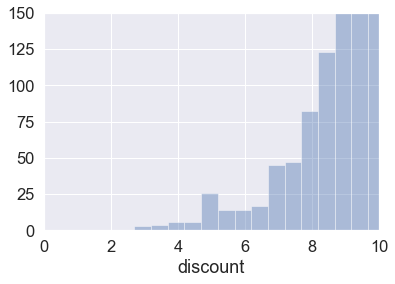

In [138]:
sns.set(font_scale=1.5)
g = sns.distplot(dis_data['discount'], kde=False)
g.set_xlim(0, 10)
g.set_ylim(0, 150)

In [139]:
dis_data[dis_data['discount']<7].groupby('fields.shortInfo')['fields.title'].count().nlargest(5)

fields.shortInfo
桂林    16
上海    12
香港    10
三亚     7
深圳     6
Name: fields.title, dtype: int64

#### 7. 各级别景区的门票价格

In [140]:
data_final.sample(5)

,city,fields.comment,fields.discountPrice,fields.features,fields.itemId,fields.itemTotalScore,fields.latitude,fields.longitude,fields.price,fields.shortInfo,fields.sold365,fields.soldRecentNum,fields.tagList,fields.title,trip_main_busness_type,province,discount
15955,福州,0.0,178.0,21:40前可订今日票,-2035296926,0.0,0.0,0.0,178.0,福州,4.0,0,None,福建 福州 溪山温泉 温泉票+鱼疗+简餐xc,vocation,福建省,10.0
19057,青岛,8.0,330.0,17:00前可订今日票,-1120982243,5.0,0.0,0.0,330.0,青岛,26.0,0,None,【官方年卡+全年不限次数】青岛海底世界海洋馆旅游景区景点门票,vocation,山东省,10.0
47555,香港,1.0,499.0,16:00前可订今日票,436618332,5.0,0.0,0.0,499.0,香港,1517.0,0,None,无需换票 香港迪士尼乐园门票Disney1日票电子票当天可订快速出票,vocation,香港,10.0
34017,三亚,0.0,241.0,最早可定明日票,-1045904482,0.0,0.0,0.0,241.0,三亚,4.0,2,None,官方正规票！三亚蜈支洲岛门票船票+蜈支洲疍家乐自助午餐,vocation,海南省,10.0
37230,成都,28.0,78.0,16:40前可订今日票,-944161564,4.9,0.0,0.0,78.0,成都,138.0,0,None,【自动发码】四川 成都 都江堰 大门票 都江堰门票 成都旅游,vocation,四川省,10.0


In [141]:
level = ['A', 'AA', 'AAA', '4A景区', '5A景区']
level_data=data.groupby('fields.tagList')['fields.price'].mean()

In [142]:
data_final.groupby('fields.tagList')['fields.price'].mean()

fields.tagList
4A景区     79.781033
5A景区    121.984286
A        72.377778
AA       71.005000
AAA      53.908148
今日可用    162.322308
山        95.000000
明日可用    158.617455
景点      142.800000
演出      276.666667
赛事      150.000000
Name: fields.price, dtype: float64

In [143]:
level_data.index

Index(['4A景区', '5A景区', 'A', 'AA', 'AAA', '今日可用', '山', '明日可用', '景点', '演出',
       '赛事'],
      dtype='object', name='fields.tagList')

In [144]:
bar=(
    Bar(init_opts=opts.InitOpts(page_title="各级别景区的门票价格"))
    .set_global_opts(title_opts=opts.TitleOpts(title="各级别景区的门票价格"))
    .add_xaxis(level_data.index.tolist())
    .add_yaxis("",np.round(level_data.values,0).tolist())
)
bar.render("各级别景区的门票价格.html")
bar.render_notebook()